In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 749 entries, 0 to 748
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    749 non-null    object 
 1   Open    749 non-null    float64
 2   High    749 non-null    float64
 3   Low     749 non-null    float64
 4   Close   749 non-null    float64
 5   Volume  749 non-null    object 
dtypes: float64(4), object(2)
memory usage: 35.2+ KB


In [220]:
df['Volume'] = df['Volume'].replace({',': ''}, regex=True).astype(float)


In [219]:
df = pd.read_csv('..\data\TSLA_1yr.csv')

In [221]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sort the data by date
df = df.sort_values(by='Date')

In [222]:
df.tail(5)

,Date,Open,High,Low,Close,Volume
4,2025-03-10,252.54,253.37,220.00,222.15,189076891.0
3,2025-03-11,225.31,237.06,217.02,230.58,174896406.0
2,2025-03-12,247.22,251.84,241.10,248.09,142215703.0
1,2025-03-13,248.13,248.29,232.60,240.68,114813508.0
0,2025-03-14,247.31,251.58,240.73,249.98,100242305.0


In [223]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Summary statistics
print("\nSummary Statistics:\n", df.describe())

# Check the date range in the dataset
print("\nDate Range:\n", df['Date'].min(), "to", df['Date'].max())

Missing Values:
 Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

Summary Statistics:
                                 Date        Open        High         Low  \
count                            749  749.000000  749.000000  749.000000   
mean   2023-09-15 10:19:03.925233664  239.947677  245.196969  234.186903   
min              2022-03-21 00:00:00  103.000000  111.750000  101.810000   
25%              2022-12-15 00:00:00  189.000000  194.120000  185.260000   
50%              2023-09-15 00:00:00  232.250000  237.400000  226.670000   
75%              2024-06-13 00:00:00  267.480000  272.900000  261.120000   
max              2025-03-14 00:00:00  475.900000  488.540000  457.510000   
std                              NaN   66.875656   68.321601   64.875707   

            Close        Volume  
count  749.000000  7.490000e+02  
mean   239.635501  1.069563e+08  
min    108.100000  3.716762e+07  
25%    189.560000  7.801020e+07  
50%    232.960000  1.

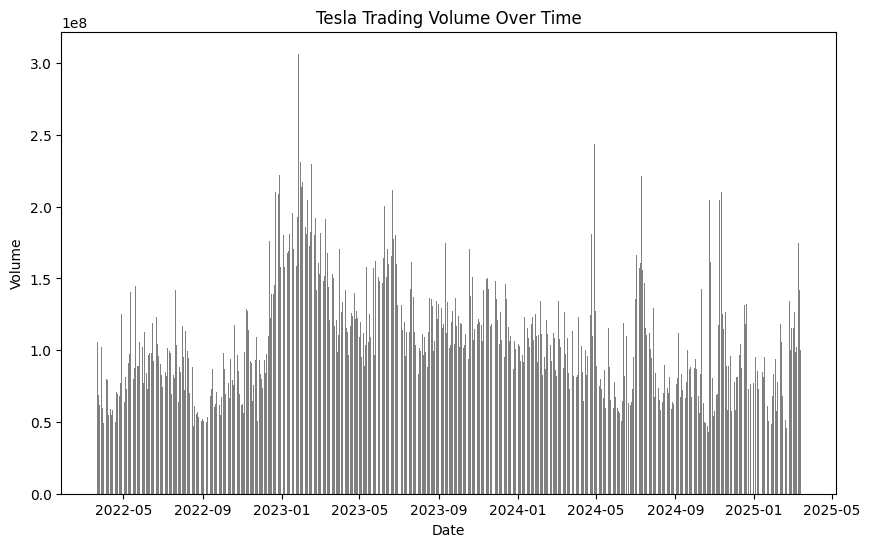

In [224]:
# Plot trading volume over time
plt.figure(figsize=(10, 6))
plt.bar(df['Date'], df['Volume'], color='gray', width=1)
plt.xlabel("Date")
plt.ylabel("Volume")
plt.title("Tesla Trading Volume Over Time")
plt.show()

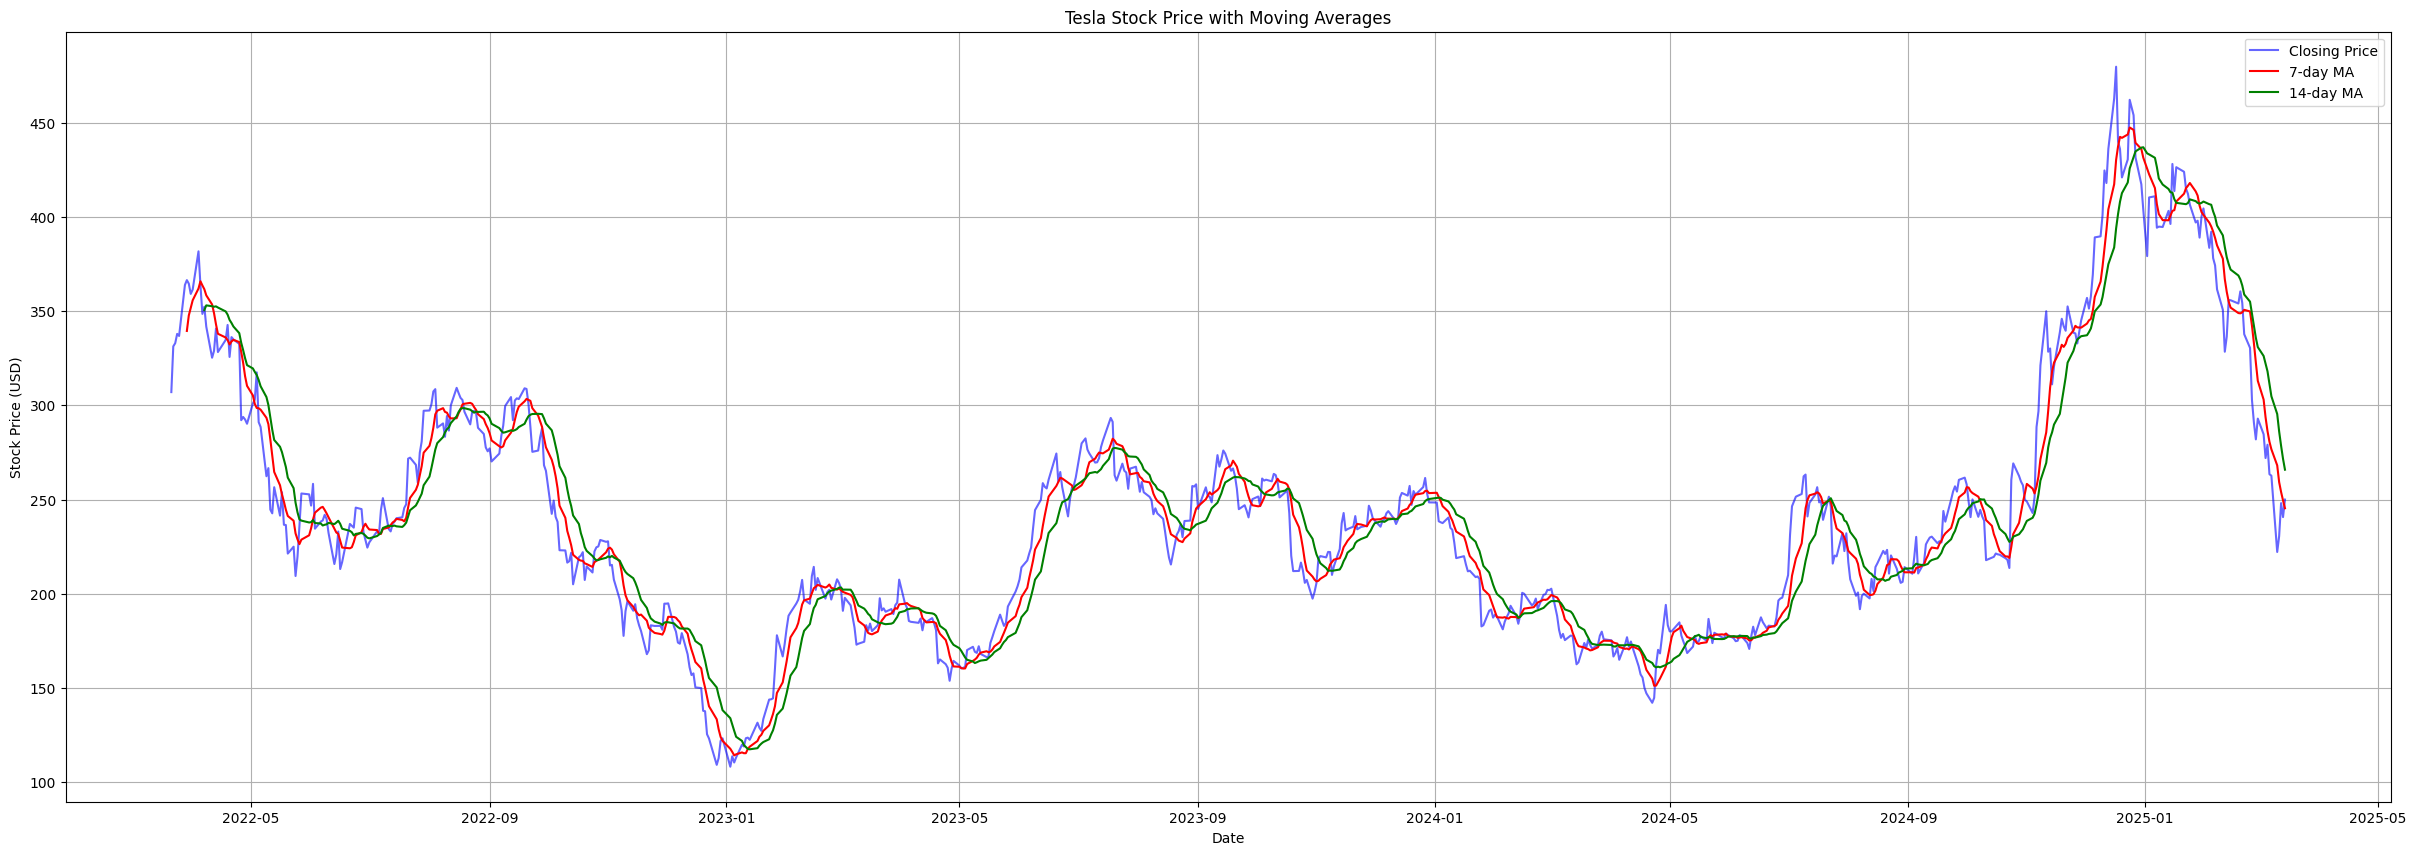

In [208]:
# Compute moving averages (7-day and 14-day)
df['MA7'] = df['Close'].rolling(window=7).mean()
df['MA14'] = df['Close'].rolling(window=14).mean()

# Plot the closing price with moving averages
plt.figure(figsize=(30, 10))
plt.plot(df['Date'], df['Close'], label="Closing Price", color='blue', alpha=0.6)
plt.plot(df['Date'], df['MA7'], label="7-day MA", color='red')
plt.plot(df['Date'], df['MA14'], label="14-day MA", color='green')
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.title("Tesla Stock Price with Moving Averages")
plt.legend()
plt.grid()
plt.show()

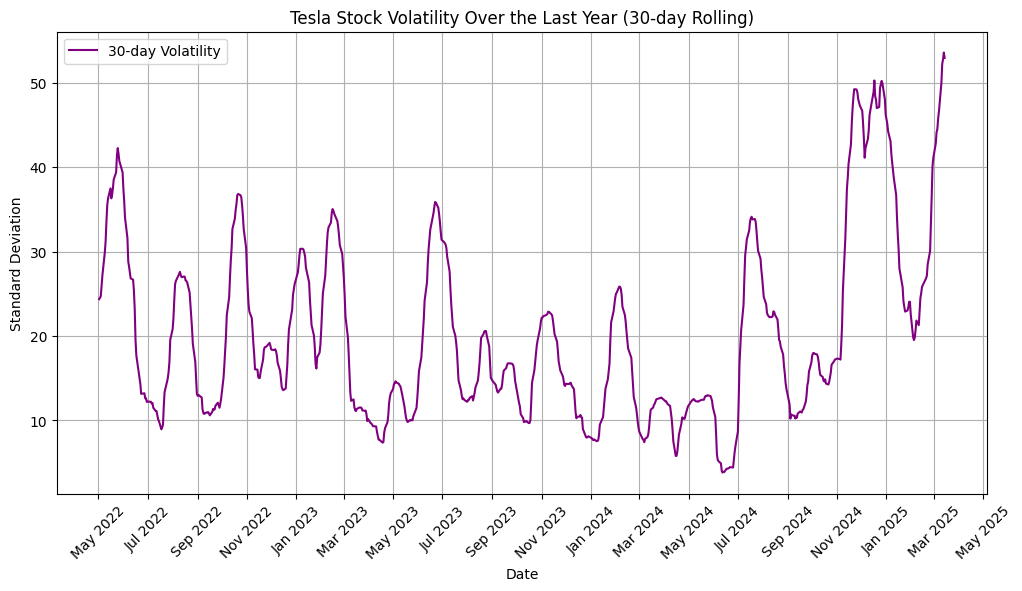

In [209]:
# Compute rolling standard deviation (volatility)
df['Volatility'] = df['Close'].rolling(window=30).std()

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Volatility'], label="30-day Volatility", color='purple')

# Format the x-axis dates
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.xlabel("Date")
plt.ylabel("Standard Deviation")
plt.title("Tesla Stock Volatility Over the Last Year (30-day Rolling)")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()


In [225]:
import numpy as np

# Function to calculate RSI
def calculate_rsi(df, window=14):
    delta = df['Close'].diff()
    gain = np.where(delta > 0, delta, 0)  # Only keep gains
    loss = np.where(delta < 0, -delta, 0)  # Only keep losses

    avg_gain = pd.Series(gain).rolling(window=window, min_periods=1).mean()
    avg_loss = pd.Series(loss).rolling(window=window, min_periods=1).mean()

    rs = avg_gain / (avg_loss + 1e-10)  # Avoid division by zero
    rsi = 100 - (100 / (1 + rs))
    
    df['RSI'] = rsi
    return df



In [227]:
def add_stochrsi_and_volatility(df):
    """
    Adds Stochastic RSI and 20-day rolling volatility (std dev) to the DataFrame.
    Assumes RSI_14 is already computed.
    """
    # --- Stochastic RSI ---
    rsi_window = 14
    stoch_rsi = (df['RSI'] - df['RSI'].rolling(rsi_window).min()) / \
                (df['RSI'].rolling(rsi_window).max() - df['RSI'].rolling(rsi_window).min())
    df['StochRSI'] = stoch_rsi

    # --- Volatility (20-day std of Close) ---
    df['Volatility_20'] = df['Close'].rolling(window=20).std()

    return df



In [228]:
display(df)


,Date,Open,High,Low,Close,Volume
748,2022-03-21,304.99,314.28,302.36,307.05,81981736.0
747,2022-03-22,310.00,332.62,307.25,331.33,105868670.0
746,2022-03-23,326.65,346.90,325.47,333.04,120676263.0
745,2022-03-24,336.58,341.50,329.60,337.97,68920965.0
744,2022-03-25,336.00,340.60,332.44,336.88,62031605.0
...,...,...,...,...,...,...
4,2025-03-10,252.54,253.37,220.00,222.15,189076891.0
3,2025-03-11,225.31,237.06,217.02,230.58,174896406.0
2,2025-03-12,247.22,251.84,241.10,248.09,142215703.0
1,2025-03-13,248.13,248.29,232.60,240.68,114813508.0


In [229]:
import matplotlib.dates as mdates

plt.figure(figsize=(30, 6))
plt.plot(df['Date'], df['RSI'], label="RSI (14-day)", color='blue')

# Add horizontal reference lines
plt.axhline(45, linestyle="--", color="green", label="RSI Entry Level (45)")
plt.axhline(60, linestyle="--", color="red", label="RSI Exit Level (60)")
plt.axhline(70, linestyle="--", color="orange", label="RSI Top Level (70)")
plt.axhline(30, linestyle="--", color="purple", label="RSI Bottom Level (30)")

# Format x-axis
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xlabel("Date")
plt.ylabel("RSI Value")
plt.title("Relative Strength Index (RSI) - Full Dataset")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

KeyError: 'RSI'

<Figure size 3000x600 with 0 Axes>

In [230]:
# Compute MACD, Signal Line, and Histogram
def compute_macd(data, short_period=7, long_period=14, signal_period=9):
    """Calculates MACD, Signal Line, and MACD Histogram."""
    data['MACD_Line'] = data['Close'].ewm(span=short_period, adjust=False).mean() - data['Close'].ewm(span=long_period, adjust=False).mean()
    data['Signal_Line'] = data['MACD_Line'].ewm(span=signal_period, adjust=False).mean()
    data['MACD_Histogram'] = data['MACD_Line'] - data['Signal_Line']
    return data
# Apply MACD calculation to the dataset
df = compute_macd(df)

In [231]:
# After you've computed RSI & MACD...
df = calculate_rsi(df)
df = compute_macd(df)

# Now add the new features
df = add_stochrsi_and_volatility(df)


In [232]:
df

,Date,Open,High,Low,Close,Volume,MACD_Line,Signal_Line,MACD_Histogram,RSI,StochRSI,Volatility_20
748,2022-03-21,304.99,314.28,302.36,307.05,81981736.0,0.000000,0.000000,0.000000,28.486726,NaN,NaN
747,2022-03-22,310.00,332.62,307.25,331.33,105868670.0,2.832667,0.566533,2.266133,23.776866,NaN,NaN
746,2022-03-23,326.65,346.90,325.47,333.04,120676263.0,4.778978,1.409022,3.369956,22.652673,NaN,NaN
745,2022-03-24,336.58,341.50,329.60,337.97,68920965.0,6.459947,2.419207,4.040740,14.490220,NaN,NaN
744,2022-03-25,336.00,340.60,332.44,336.88,62031605.0,7.210079,3.377382,3.832698,13.555015,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4,2025-03-10,252.54,253.37,220.00,222.15,189076891.0,-24.082215,-19.568630,-4.513585,96.594814,0.967595,40.541155
3,2025-03-11,225.31,237.06,217.02,230.58,174896406.0,-24.838568,-20.622618,-4.215950,100.000000,1.000000,43.143155
2,2025-03-12,247.22,251.84,241.10,248.09,142215703.0,-22.459412,-20.989977,-1.469435,100.000000,1.000000,44.548782
1,2025-03-13,248.13,248.29,232.60,240.68,114813508.0,-21.028813,-20.997744,-0.031069,100.000000,1.000000,45.651097


In [ ]:
def generate_labels_flexible(data, lookback=60, lookahead=1, return_threshold=0.005):
    """
    Generates labels based on future return only (with optional indicator context).
    More flexible and outcome-focused approach.
    
    Parameters:
    - lookback: days used for LSTM input
    - lookahead: days ahead to evaluate profit/loss
    - return_threshold: minimum return for Buy/Sell labeling
    
    Returns:
    - X (features), y (labels), scaler
    """
    features = ['Close', 'Volume', 'RSI', 'MACD_Line', 'Signal_Line', 'MACD_Histogram']
    
    # Normalize
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    data[features] = scaler.fit_transform(data[features])

    X, y = [], []

    for i in range(lookback, len(data) - lookahead):
        X_seq = data[features].iloc[i - lookback:i].values
        current_price = data['Close'].iloc[i]
        future_price = data['Close'].iloc[i + lookahead]
        future_return = (future_price - current_price) / current_price

        # Outcome-driven labeling
        if future_return > return_threshold:
            label = 1  # Buy
        elif future_return < -return_threshold:
            label = -1  # Sell
        else:
            label = 0  # Hold

        X.append(X_seq)
        y.append(label)

    return np.array(X), np.array(y), scaler


In [160]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
# Convert labels to categorical (One-Hot Encoding for multi-class classification)
y_categorical = to_categorical(y, num_classes=3)  # Three classes: Buy, Hold, Sell

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42, stratify=y)

# Update LSTM model to predict 3 classes
def build_lstm_model(input_shape):
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        LSTM(50, return_sequences=False),
        Dropout(0.2),
        Dense(25, activation='relu'),
        Dense(3, activation='softmax')  # Three classes (Buy, Hold, Sell)
    ])

    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create and train model
lstm_model = build_lstm_model((X_train.shape[1], X_train.shape[2]))

e:\Personal\GitHub\ML-tsla-stock-prediction\sp_venv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [161]:
X_new, y_new, scaler_new = generate_labels_flexible(df)
print("Class Distribution:", np.unique(y_new, return_counts=True))

C:\Users\risha\AppData\Local\Temp\ipykernel_9152\789027149.py:27: RuntimeWarning: divide by zero encountered in scalar divide
  future_return = (future_price - current_price) / current_price


Class Distribution: (array([-1,  0,  1]), array([322,  50, 321]))


In [162]:
# Train the model
history = lstm_model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.8873 - loss: 0.7098 - val_accuracy: 0.8705 - val_loss: 0.4644
Epoch 2/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8795 - loss: 0.4688 - val_accuracy: 0.8705 - val_loss: 0.4611
Epoch 3/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8714 - loss: 0.4637 - val_accuracy: 0.8705 - val_loss: 0.4584
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8753 - loss: 0.4599 - val_accuracy: 0.8705 - val_loss: 0.4591
Epoch 5/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8627 - loss: 0.4853 - val_accuracy: 0.8705 - val_loss: 0.4590
Epoch 6/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8603 - loss: 0.4916 - val_accuracy: 0.8705 - val_loss: 0.4545
Epoch 7/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8746 - loss: 0.4408 - val_accuracy: 0.8705 - val_loss: 0.4591
Epoch 8/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8771 - loss: 0.4455 - val_accuracy: 0.8705 - v

In [164]:
initial_balance = 10000
balance = initial_balance
shares_held = 0
trade_log = []

actions = ['Hold', 'Buy', 'Sell']
df_test = df.iloc[-len(y_test):].copy()
df_test['Predicted_Action'] = [actions[i] for i in np.argmax(lstm_model.predict(X_test), axis=1)]
df_test['Actual_Action'] = [actions[i] for i in np.argmax(y_test, axis=1)]

for i in range(len(df_test) - 1):
    action = df_test.iloc[i]['Predicted_Action']
    next_close = df_test.iloc[i + 1]['Close']  # Next day's close price

    if action == "Buy" and balance >= next_close:
        shares_to_buy = balance // next_close
        balance -= shares_to_buy * next_close
        shares_held += shares_to_buy
        trade_log.append(f"BUY {shares_to_buy} shares at {next_close:.2f}")

    elif action == "Sell" and shares_held > 0:
        balance += shares_held * next_close
        trade_log.append(f"SELL {shares_held} shares at {next_close:.2f}")
        shares_held = 0  # Reset holdings

# Final portfolio value
final_balance = balance + (shares_held * df_test.iloc[-1]['Close'])
profit = final_balance - initial_balance

print(f"Final Portfolio Balance: ${final_balance:.2f}")
print(f"Total Profit/Loss: ${profit:.2f}")

# Display first 10 trades
print("\nTrade Log:")
for trade in trade_log[:10]:
    print(trade)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Final Portfolio Balance: $10000.00
Total Profit/Loss: $0.00

Trade Log:


In [165]:
# Buy & Hold Baseline
initial_price = df_test.iloc[0]['Close']
final_price = df_test.iloc[-1]['Close']
buy_and_hold_return = (final_price - initial_price) / initial_price * 100

print(f"Buy & Hold Return: {buy_and_hold_return:.2f}%")
print(f"LSTM Strategy Return: {(profit / initial_balance) * 100:.2f}%")

Buy & Hold Return: 32.64%
LSTM Strategy Return: 0.00%


In [177]:
test_loss, test_accuracy = lstm_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8705 - loss: 0.4087
Test Accuracy: 0.8705


In [178]:
X, y, scaler = generate_labels_with_filters(df)

import numpy as np
unique, counts = np.unique(y, return_counts=True)
print("Class Distribution:")
for cls, count in zip(unique, counts):
    print(f"  {cls}: {count} samples")

print("X shape:", X.shape)


C:\Users\risha\AppData\Local\Temp\ipykernel_9152\3623188054.py:27: RuntimeWarning: divide by zero encountered in scalar divide
  future_return = (future_price - current_price) / current_price


Class Distribution:
  -1: 40 samples
  0: 617 samples
  1: 36 samples
X shape: (693, 60, 6)


In [179]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Make predictions on test set
y_pred_probs = lstm_model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probability output to class labels
y_true = np.argmax(y_test, axis=1)  # Convert one-hot encoded labels to class labels

# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=['Hold', 'Buy', 'Sell']))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Classification Report:
              precision    recall  f1-score   support

        Hold       0.87      1.00      0.93       121
         Buy       0.00      0.00      0.00         5
        Sell       0.00      0.00      0.00        13

    accuracy                           0.87       139
   macro avg       0.29      0.33      0.31       139
weighted avg       0.76      0.87      0.81       139

Confusion Matrix:
[[121   0   0]
 [  5   0   0]
 [ 13   0   0]]


e:\Personal\GitHub\ML-tsla-stock-prediction\sp_venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\Personal\GitHub\ML-tsla-stock-prediction\sp_venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\Personal\GitHub\ML-tsla-stock-prediction\sp_venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

In [180]:
import pandas as pd
import numpy as np

# Load the test data (2025-01-02 to 2025-03-19)
df_test_eval = pd.read_csv("..\data\TSLA_test.csv")
df_test_eval['Date'] = pd.to_datetime(df_test_eval['Date'])
df_test_eval = df_test_eval.sort_values('Date').reset_index(drop=True)

# Clean volume if needed
df_test_eval['Volume'] = df_test_eval['Volume'].astype(str).str.replace(',', '').astype(float)

# Compute technical indicators
df_test_eval = calculate_rsi(df_test_eval)
df_test_eval = compute_macd(df_test_eval)

# Normalize using the same scaler from training
features = ['Close', 'Volume', 'RSI', 'MACD_Line', 'Signal_Line', 'MACD_Histogram']
df_test_eval[features] = scaler.transform(df_test_eval[features])  # use training-time scaler

# Create LSTM input sequences
lookback = 45
X_eval = []
eval_dates = []

for i in range(lookback, len(df_test_eval)):
    X_eval.append(df_test_eval[features].iloc[i - lookback:i].values)
    eval_dates.append(df_test_eval['Date'].iloc[i])

X_eval = np.array(X_eval)


In [181]:
# Get predictions from the trained model
y_eval_pred = np.argmax(lstm_model.predict(X_eval), axis=1)
action_labels = ['Sell', 'Hold', 'Buy']  # map class index to action

# Build a DataFrame with predictions
eval_results = pd.DataFrame({
    'Date': eval_dates,
    'Close': df_test_eval['Close'].iloc[lookback:].values,
    'Predicted_Action': [action_labels[i] for i in y_eval_pred]
})

eval_results.head(12)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


,Date,Close,Predicted_Action
0,2025-03-11,230.58,Sell
1,2025-03-12,248.09,Sell
2,2025-03-13,240.68,Sell
3,2025-03-14,249.98,Sell
4,2025-03-17,238.01,Sell
5,2025-03-18,225.31,Sell
6,2025-03-19,235.86,Sell
7,2025-03-20,236.26,Sell
8,2025-03-21,248.71,Sell
